In [1]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [26]:
a = pd.read_excel("arima_data.xlsx", sheet_name="alış_miktarı")
alis = pd.DataFrame()
alis["alis_miktari"] = a["alis_miktari"]
alis["tarihler"] = a["tarihler"]

In [27]:
alis.head()

,alis_miktari,tarihler
0,230,2013-01-01
1,222,2013-02-01
2,432,2013-03-01
3,356,2013-04-01
4,375,2013-05-01


In [28]:
alis['tarihler'] = pd.to_datetime(alis['tarihler'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = alis.set_index(['tarihler'])
indexedDataset.head(5)

,alis_miktari
tarihler,
2013-01-01,230
2013-02-01,222
2013-03-01,432
2013-04-01,356
2013-05-01,375


In [29]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf


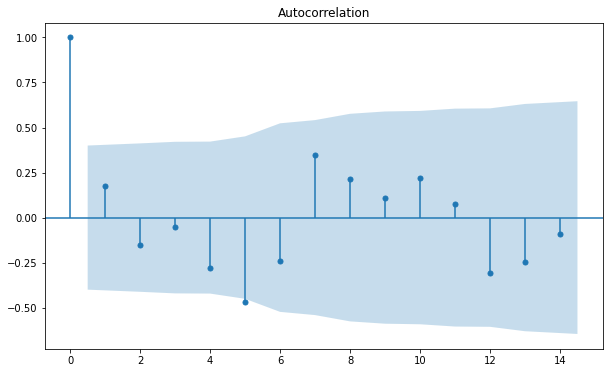

In [30]:
plot_acf(indexedDataset)
pyplot.show()

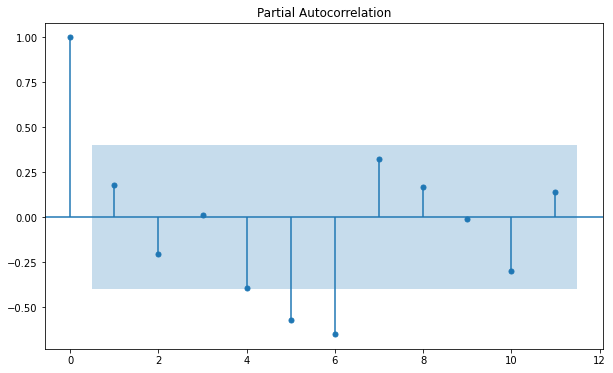

In [31]:
plot_pacf(indexedDataset, lags=11)
pyplot.show()

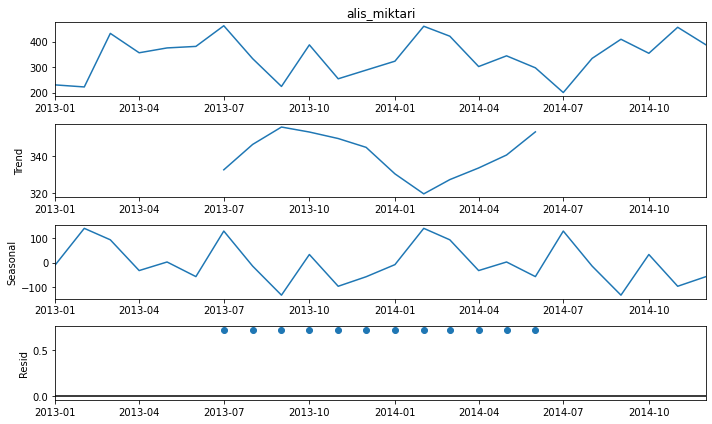

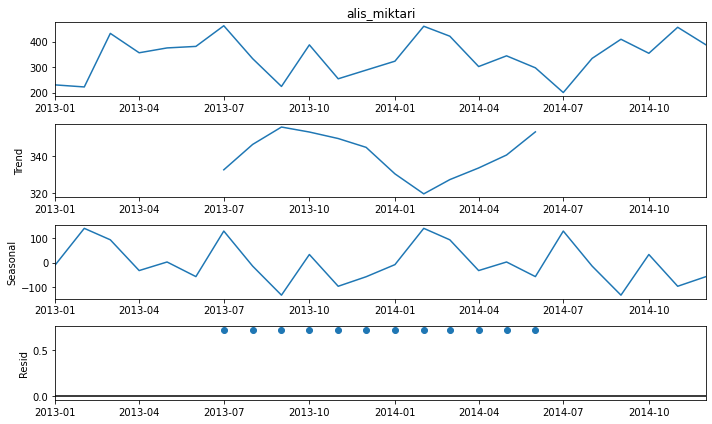

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(indexedDataset["alis_miktari"], model="add")
result.plot()

In [33]:
import pmdarima as pm
pm.auto_arima(indexedDataset["alis_miktari"], seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   24
Model:                        SARIMAX   Log Likelihood                -138.369
Date:                Sat, 29 May 2021   AIC                            280.738
Time:                        00:07:30   BIC                            283.094
Sample:                             0   HQIC                           281.363
                                 - 24                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    343.0000     16.124     21.272      0.000     311.397     374.603
sigma2      5960.1667   2418.286      2.465      0.014    1220.412    1.07e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):                 1.07
Prob(Q):                              0.36   Prob(JB):                         0.58
Heteroskedasticity (H):               0.80   Skew:                            -0.22
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/eda/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


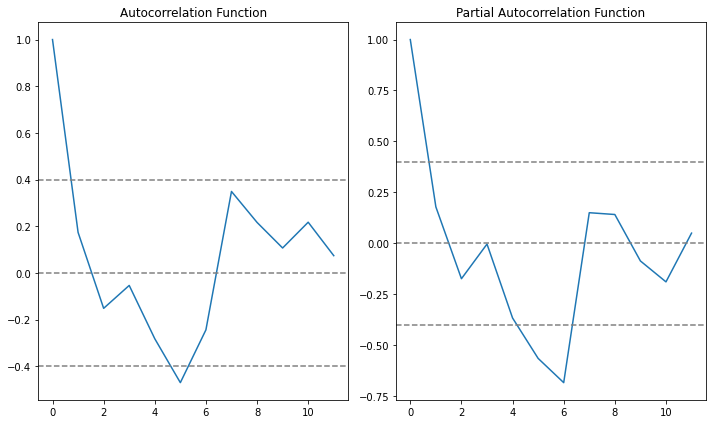

In [35]:
#ACF & PACF plots

lag_acf = acf(indexedDataset, nlags=11)
lag_pacf = pacf(indexedDataset, nlags=11, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDataset)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexedDataset)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDataset)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexedDataset)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()   

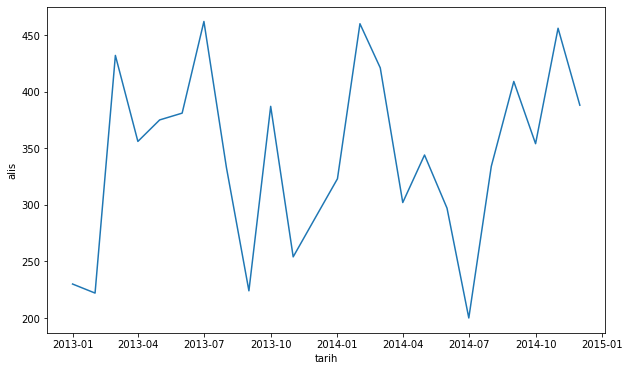

In [36]:
## plot graph
plt.xlabel('tarih')
plt.ylabel('alis')
plt.plot(indexedDataset)

In [37]:
#Determine rolling statistics
rolmean = indexedDataset.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            alis_miktari
tarihler                
2013-01-01           NaN
2013-02-01           NaN
2013-03-01           NaN
2013-04-01           NaN
2013-05-01           NaN
2013-06-01           NaN
2013-07-01           NaN
2013-08-01           NaN
2013-09-01           NaN
2013-10-01           NaN
2013-11-01           NaN
2013-12-01    328.666667
2014-01-01    336.416667
2014-02-01    356.250000
2014-03-01    355.333333
2014-04-01    350.833333
2014-05-01    348.250000
2014-06-01    341.250000
2014-07-01    319.416667
2014-08-01    319.500000
2014-09-01    334.916667
2014-10-01    332.166667
2014-11-01    349.000000
2014-12-01    357.333333             alis_miktari
tarihler                
2013-01-01           NaN
2013-02-01           NaN
2013-03-01           NaN
2013-04-01           NaN
2013-05-01           NaN
2013-06-01           NaN
2013-07-01           NaN
2013-08-01           NaN
2013-09-01           NaN
2013-10-01           NaN
2013-11-01           NaN
2013-12-01     83.560901


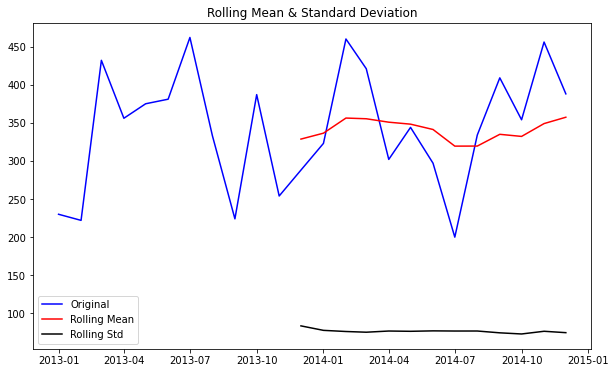

In [38]:
#Plot rolling statistics
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [39]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['alis_miktari'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -6.198373e+00
p-value                        5.889042e-08
#Lags Used                     5.000000e+00
Number of Observations Used    1.800000e+01
Critical Value (1%)           -3.859073e+00
Critical Value (5%)           -3.042046e+00
Critical Value (10%)          -2.660906e+00
dtype: float64


In [10]:
# p %5 ten buyuk yani duragan degil fark alma islemleri yapilacak

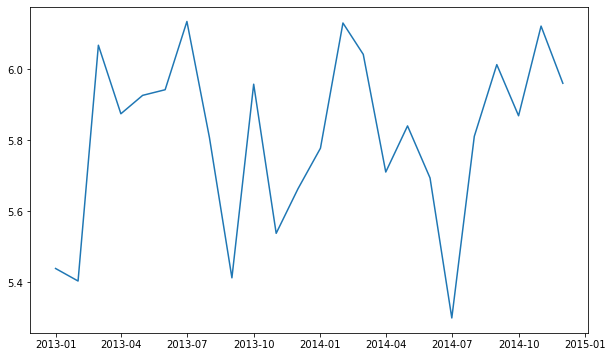

In [40]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

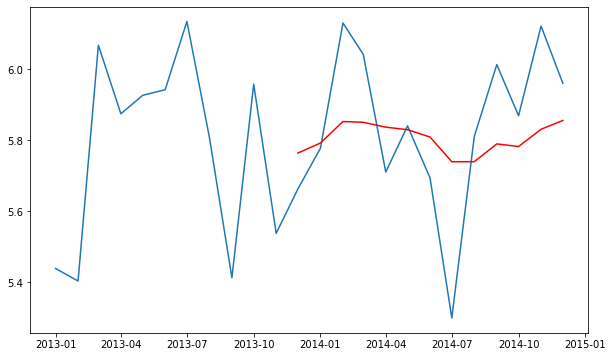

In [41]:
#The below transformation is required to make series stationary
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [42]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,alis_miktari
tarihler,
2013-12-01,-0.101032
2014-01-01,-0.014638
2014-02-01,0.278224
2014-03-01,0.191779
2014-04-01,-0.126718
2014-05-01,0.010687
2014-06-01,-0.115467
2014-07-01,-0.441111
2014-08-01,0.071463


In [43]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['alis_miktari'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

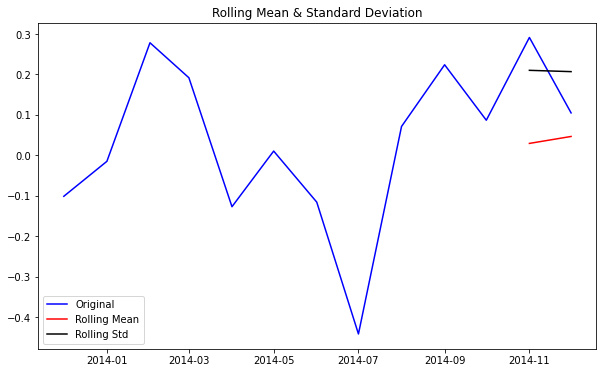

Results of Dickey Fuller Test:
Test Statistic                -3.212249
p-value                        0.019286
#Lags Used                     4.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


In [44]:
test_stationarity(datasetLogScaleMinusMovingAverage)

In [17]:
# p buyuk duragan degil

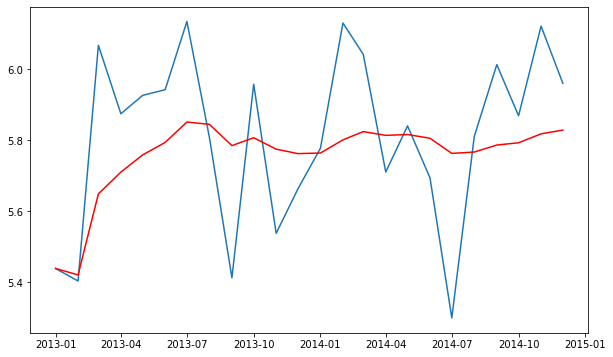

In [45]:

exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

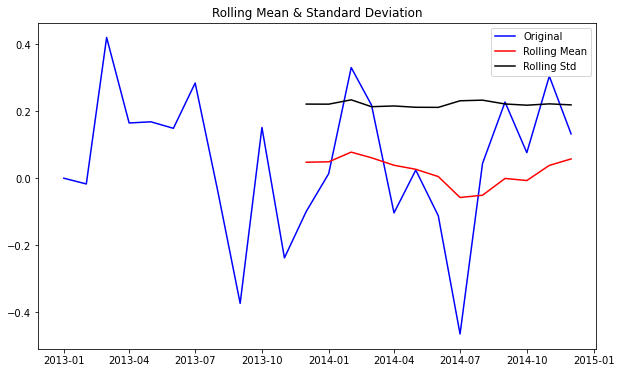

Results of Dickey Fuller Test:
Test Statistic                 -3.399321
p-value                         0.010982
#Lags Used                      5.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


In [46]:
datasetLogScaleMinusExponentialMovingAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

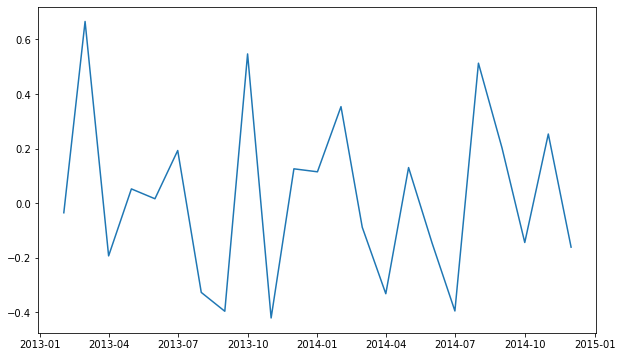

In [47]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

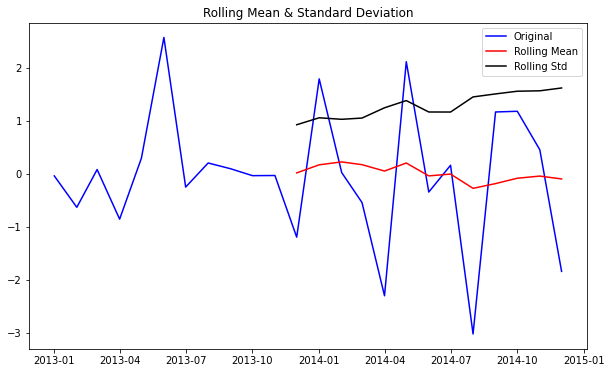

Results of Dickey Fuller Test:
Test Statistic                 -5.504815
p-value                         0.000002
#Lags Used                      2.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [23]:


#datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)



In [48]:
k = datasetLogDiffShifting.iloc[1:]
ort = k["alis_miktari"].mean()
ort
datasetLogDiffShifting.fillna(ort, inplace=True)
datasetLogDiffShifting

,alis_miktari
tarihler,
2013-01-01,0.022736
2013-02-01,-0.035402
2013-03-01,0.665748
2013-04-01,-0.193495
2013-05-01,0.051995
2013-06-01,0.015873
2013-07-01,0.192766
2013-08-01,-0.327422
2013-09-01,-0.396496


In [27]:
# p kucuk test statisctic saglıyo duragan data bu transformation kullanılacak

In [24]:
# time shift secildi acf ve pacf grafikleri su sekildedir:

/home/eda/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


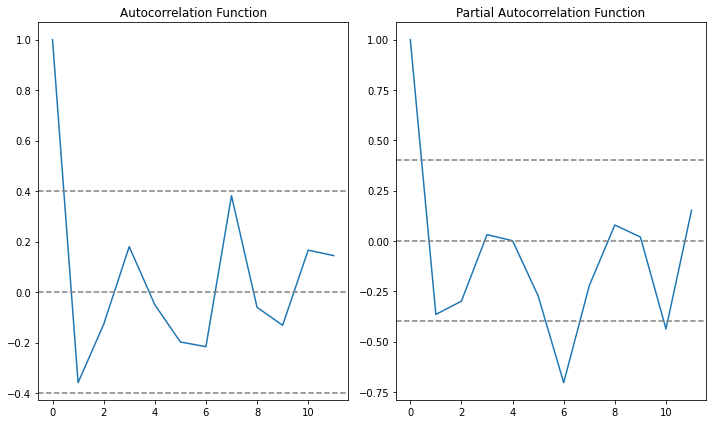

In [50]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=11)
lag_pacf = pacf(datasetLogDiffShifting, nlags=11, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()   

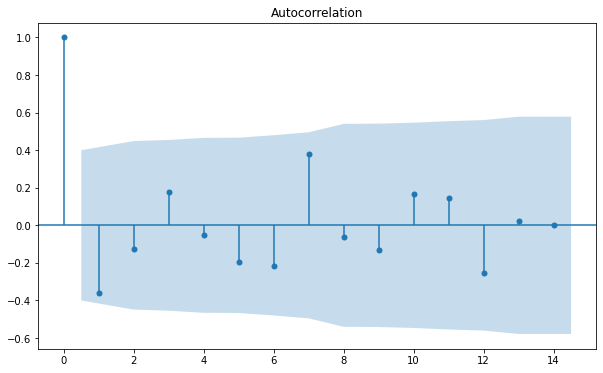

In [51]:
plot_acf(datasetLogDiffShifting)
pyplot.show()

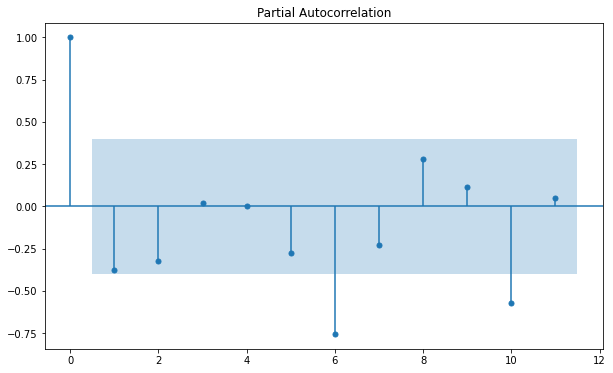

In [53]:
plot_pacf(datasetLogDiffShifting, lags=11)
pyplot.show()

In [55]:
import pmdarima as pm
pm.auto_arima(datasetLogDiffShifting["alis_miktari"], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(0, 0, 1)   Log Likelihood                  -2.745
Date:                Sat, 29 May 2021   AIC                              9.491
Time:                        00:13:55   BIC                             11.847
Sample:                             0   HQIC                            10.116
                                 - 24                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5690      0.242     -2.353      0.019      -1.043      -0.095
sigma2         0.0724      0.022      3.328      0.001       0.030       0.115
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.81   Prob(JB):                         0.92
Heteroskedasticity (H):               0.89   Skew:                            -0.20
Prob(H) (two-sided):                  0.87   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(indexedDataset["alis_miktari"], order=(1,1,1), seasonal_order=(1,1,1,12) )
res = mod.fit(disp=False)
print(res.summary())

/home/eda/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/eda/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/eda/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                       alis_miktari   No. Observations:                   24
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -70.739
Date:                            Sat, 29 May 2021   AIC                            151.479
Time:                                    00:30:15   BIC                            153.468
Sample:                                01-01-2013   HQIC                           150.225
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2861      0.666      0.430      0.667      -1.019       1.591
ma.L1         -0.9996    231.341   

/home/eda/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Plotting AR model


/home/eda/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/eda/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


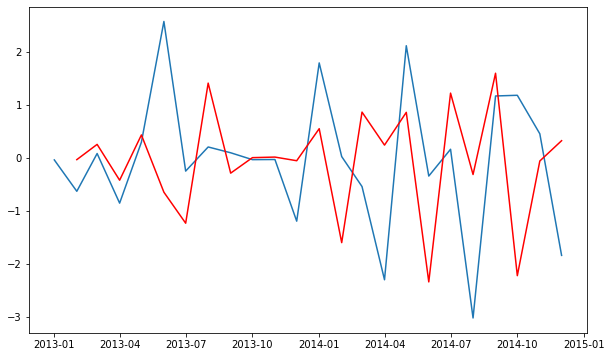

In [33]:
#AR Model
#making order=(1,1,0) gives RSS=1.5023
model = ARIMA(datasetLogDiffShifting, order=(1,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
#plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - indexedDataset['satis_miktari'])**2))
print('Plotting AR model')

Plotting MA model


/home/eda/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/eda/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


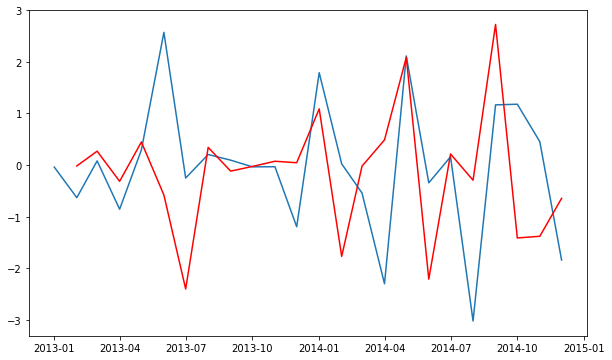

In [34]:
#MA Model
model = ARIMA(datasetLogDiffShifting, order=(0,1,1))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
#plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - indexedDataset['satis_miktari'])**2))
print('Plotting MA model')

/home/eda/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/eda/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M

Plotting ARIMA model


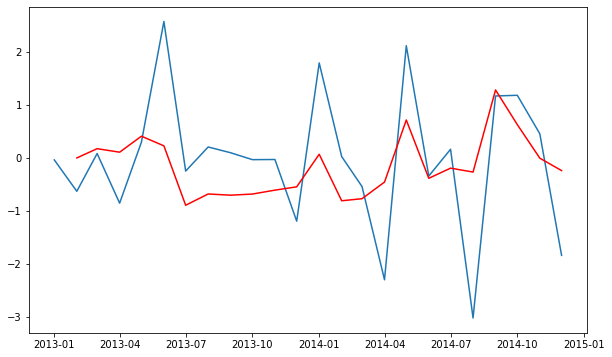

In [56]:
# AR+I+MA = ARIMA model
model = ARIMA(indexedDataset_logScale, order=(1,1,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - indexedDataset['satis_miktari'])**2))
print('Plotting ARIMA model')

In [ ]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)

In [74]:
predictions_ARIMA_diff = pd.Series(res.fittedvalues, copy=True)
print(predictions_ARIMA_diff)
len(predictions_ARIMA_diff)

tarihler
2013-01-01      0.000000
2013-02-01    228.755634
2013-03-01    221.716103
2013-04-01    429.669995
2013-05-01    356.121503
2013-06-01    374.833518
2013-07-01    380.888783
2013-08-01    461.108909
2013-09-01    334.144295
2013-10-01    225.606859
2013-11-01    386.087477
2013-12-01    256.391416
2014-01-01    401.605445
2014-02-01    319.135036
2014-03-01    614.217392
2014-04-01    420.720829
2014-05-01    400.623854
2014-06-01    404.227073
2014-07-01    450.009561
2014-08-01    241.120305
2014-09-01    222.198292
2014-10-01    449.280276
2014-11-01    244.715038
2014-12-01    349.489254
dtype: float64


24

In [75]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

tarihler
2013-01-01       0.000000
2013-02-01     228.755634
2013-03-01     450.471737
2013-04-01     880.141733
2013-05-01    1236.263236
2013-06-01    1611.096754
2013-07-01    1991.985537
2013-08-01    2453.094446
2013-09-01    2787.238741
2013-10-01    3012.845600
2013-11-01    3398.933077
2013-12-01    3655.324493
2014-01-01    4056.929938
2014-02-01    4376.064974
2014-03-01    4990.282366
2014-04-01    5411.003194
2014-05-01    5811.627048
2014-06-01    6215.854121
2014-07-01    6665.863681
2014-08-01    6906.983986
2014-09-01    7129.182278
2014-10-01    7578.462554
2014-11-01    7823.177592
2014-12-01    8172.666847
dtype: float64


In [76]:
predictions_ARIMA_log = pd.Series(datasetLogDiffShifting['alis_miktari'].iloc[0], index=datasetLogDiffShifting.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

tarihler
2013-01-01       0.022736
2013-02-01     228.778370
2013-03-01     450.494473
2013-04-01     880.164469
2013-05-01    1236.285972
dtype: float64

In [77]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)

/home/eda/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [82]:
# forecast error
forecast_errors = [alis["alis_miktari"][i]-predictions_ARIMA_diff[i] for i in range(len(alis))]
print('Forecast Errors: %s' % forecast_errors)

Forecast Errors: [230.0, -6.755634420234145, 210.28389694133347, -73.6699952955388, 18.87849716920107, 6.166481516549538, 81.1112170262727, -128.10890911257223, -110.14429450305903, 161.3931407033802, -132.08747674745007, 31.608584155461244, -78.60544532930436, 140.864964287656, -193.21739202595347, -118.72082860048374, -56.623853515913424, -107.22707278808889, -250.00956082362973, 92.8796949384635, 186.80170798797283, -95.2802755286097, 211.28496170050732, 38.51074561876828]


In [83]:
from statistics import mean
mean_forecast_error = mean(forecast_errors)

In [85]:
bias = sum(forecast_errors) * 1.0/len(alis)
print('Bias: %f' % bias)

Bias: 2.472215


In [87]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(alis["alis_miktari"], predictions_ARIMA_diff)
print('MAE: %f' % mae)

MAE: 115.009776


In [89]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(alis["alis_miktari"], predictions_ARIMA_diff)
print("MAPE: %f" %mape)


MAPE: 0.359724


In [91]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(alis["alis_miktari"], predictions_ARIMA_diff)
print('MSE: %f' % mse)

MSE: 18166.065860


In [92]:
import math
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 134.781549


In [95]:
# MAD
to = 0
for i in range(len(alis)):
    to += abs(alis["alis_miktari"][i] - predictions_ARIMA_diff[i])
to /= len(alis)
to

115.00977628068348

In [102]:
res.plot_diagnostics(variable=0) # belki lazım olursa diye

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 720x432 with 0 Axes>

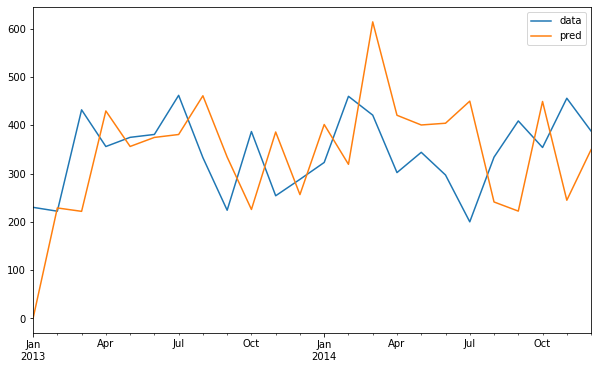

In [104]:
test = indexedDataset["alis_miktari"]
pd.DataFrame({'data':test,'pred':res.predict()}).plot();plt.show() # asıl data uzerinde prediction grafiği

In [105]:
x=res.forecast(steps=24)
x # 2 yıllık tahminler

2015-01-01    315.013966
2015-02-01    310.915201
2015-03-01    511.539578
2015-04-01    433.987874
2015-05-01    453.704247
2015-06-01    457.794890
2015-07-01    532.429282
2015-08-01    412.866032
2015-09-01    310.505189
2015-10-01    465.626056
2015-11-01    340.900915
2015-12-01    370.710421
2016-01-01    400.386497
2016-02-01    528.579916
2016-03-01    505.565229
2016-04-01    389.347032
2016-05-01    429.886445
2016-06-01    386.266529
2016-07-01    300.610930
2016-08-01    417.853087
2016-09-01    481.131297
2016-10-01    440.018319
2016-11-01    527.033942
2016-12-01    465.498225
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:>

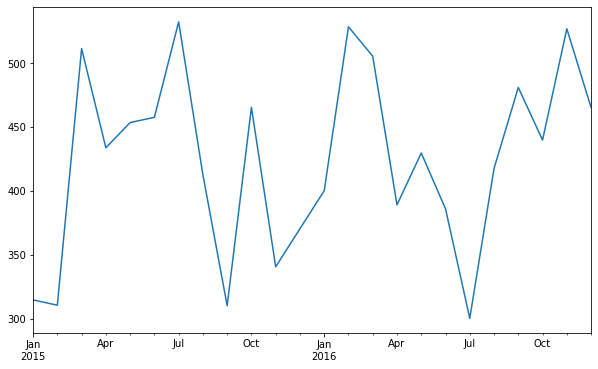

In [106]:
x.plot() # gelecek 24 ayın tahmin grafiği